In [576]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.patches import Rectangle

plt.style.use('tp1.mplstyle')

In [577]:
A = 2
F = 0.5

# Pulse wave
def pulse_train():
    return lambda t: A * np.sign(np.sin(2 * np.pi * F * t))

# Sawtooth wave
def sawtooth():
    return lambda t: A * (t * F - np.floor(0.5 + t * F))

#triangle wave 
def triangle():
    return lambda t: 4*A*abs((t*F - np.floor(0.5 + t*F)))-A

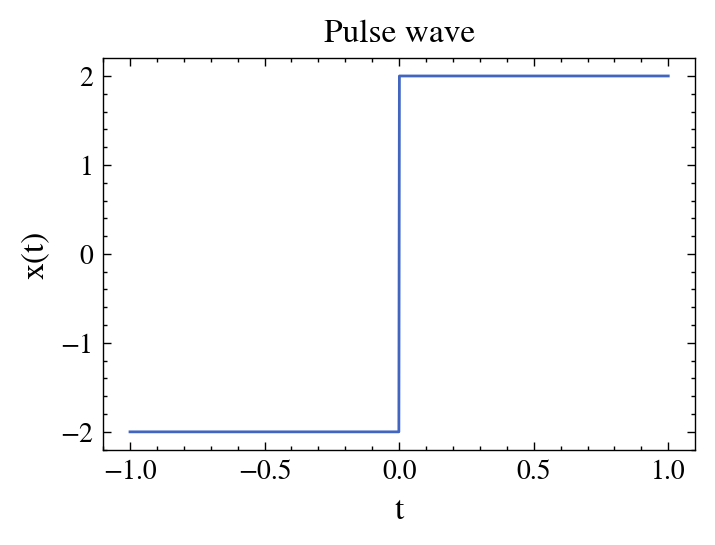

In [578]:
# Plot pulse wave

t = np.linspace(-1, 1, 1000)
x = pulse_train()
plt.plot(t, x(t))
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Pulse wave')
plt.show()

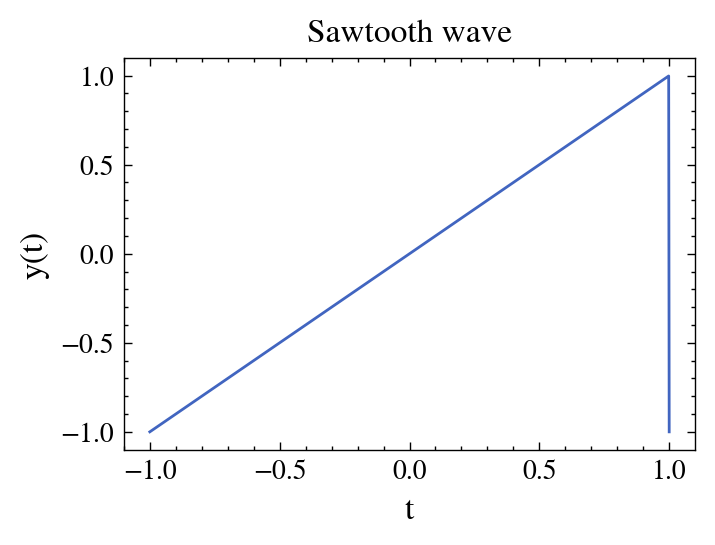

In [579]:
# Plot sawtooth wave

t = np.linspace(-1, 1, 1000)
y = sawtooth()
plt.plot(t, y(t))
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Sawtooth wave')
plt.show()

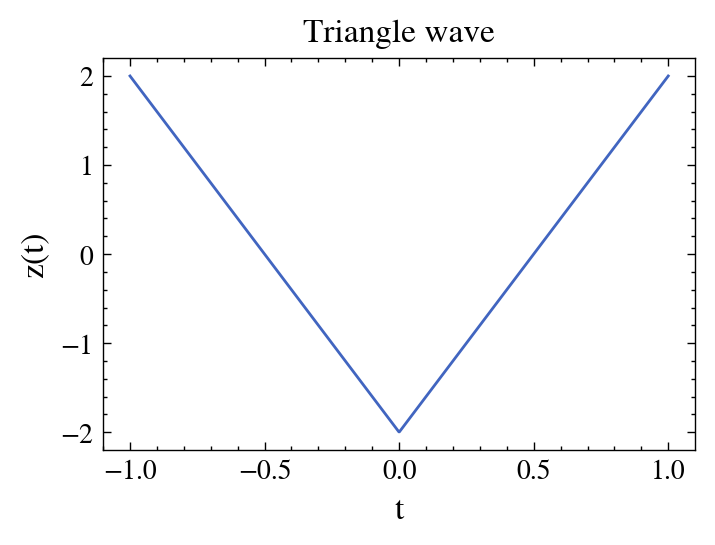

In [580]:
# Plot triangle wave

t = np.linspace(-1, 1, 1000)
z = triangle()
plt.plot(t, z(t))
plt.xlabel('t')
plt.ylabel('z(t)')
plt.title('Triangle wave')
plt.show()


In [581]:
def trigFourierSeries(an: callable, bn: callable, a0: float, T: float, N: int) -> callable:
    """
    Returns the trigonometric Fourier series of the function given
    the coefficients an and bn and the number of terms N.
    :param an: function that returns the coefficient an
    :param bn: function that returns the coefficient bn
    :param a0: constant term
    :param T: period of the function
    :param N: number of terms
    """
    def f(t: np.ndarray) -> np.ndarray:
        return a0 / 2 + sum(an(n) * np.cos(2 * np.pi * n * t / T) + bn(n) * np.sin(2 * np.pi * n * t / T) for n in range(1, N + 1))
    return f

def expFourierSeries(cn: callable, c0: float, T: float, N: int) -> callable:
    """
    Returns the exponential Fourier series of the function given
    the coefficient cn and the number of terms N.
    :param cn: function that returns the coefficient cn
    :param c0: constant term
    :param T: period of the function
    :param N: number of terms
    """
    def f(t: np.ndarray) -> np.ndarray:
        return c0 + sum(cn(n) * np.exp(2 * np.pi * 1j * n * t / T) for n in range(-N, N + 1) if n != 0)
    return f

def CuadraticMeanError(f: callable, g: callable, t: np.ndarray, discontinuities: np.ndarray = np.array([])) -> float:
    """
    Returns the cuadratic mean error between f and g in the interval t.
    :param f: function
    :param g: function
    :param t: interval
    """
    return np.mean((f(t) - g(t)) ** 2)

def amountArmonics(f: callable, an: callable, bn: callable, a0: float, T: float, epsilon: float) -> int:
    """
    Returns the number of terms N needed to have a square mean error
    less than epsilon.
    :param f: function
    :param t: interval
    :param epsilon: error
    """
    N = 1
    while CuadraticMeanError(f, trigFourierSeries(an, bn, a0, T, N), t) > epsilon:
        N += 1
    return N


In [582]:
def sf_pulse_train():
    """
    Returns the pulse train armoinc coefficients.
    """
    a0 = 0
    an = lambda n: 0
    bn = lambda n: -2 * (A / (np.pi * n)) * (np.cos(np.pi * n) - 1)
    return a0, an, bn

def sf_sawtooth():
    """
    Returns the sawtooth armoinc coefficients.
    """
    a0 = 0
    an = lambda n: -2 * A * F * np.sin(np.pi * n) / (np.pi * n)
    bn = lambda n: -A * np.cos(np.pi * n) / (np.pi * n)
    return a0, an, bn

def sf_triangle_wave():
    """
    Returns the triangle wave armoinc coefficients.
    """
    a0 = 0
    an = lambda n: 4*A*((-1)**n - 1)/(np.pi**2*n**2)
    bn = lambda n: 0
    return a0, an, bn

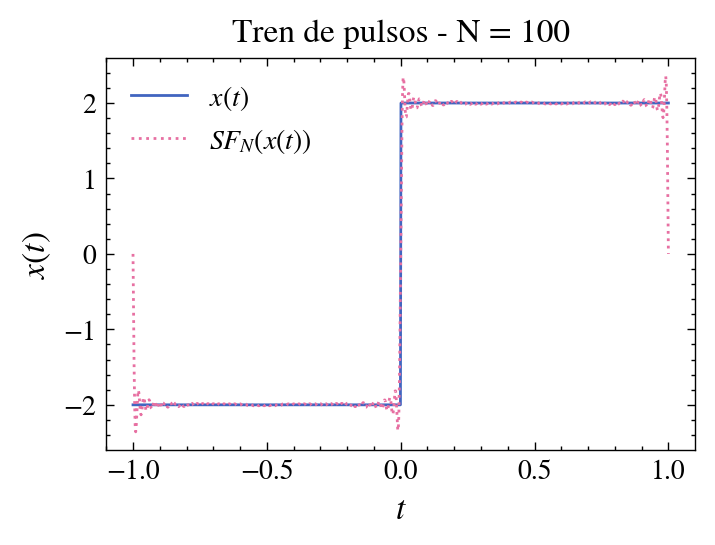

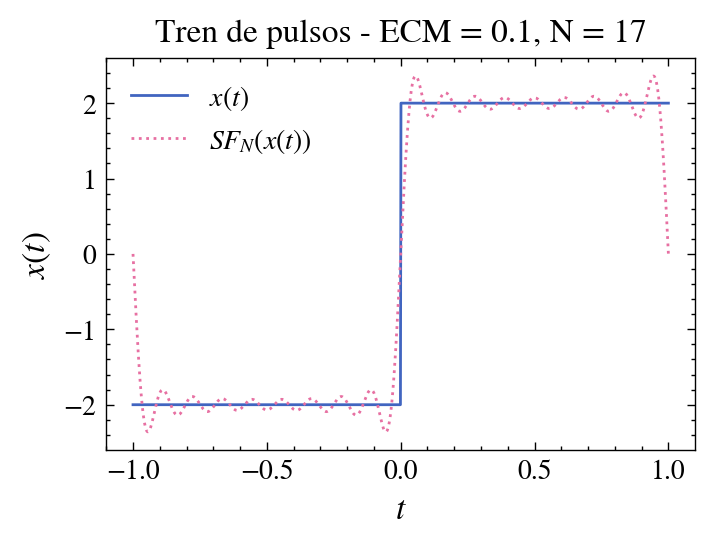

Numero de armónicos necesarios para tener un error cuadrático medio menor a 0.1 de la serie de Fourier trigonométrica del tren de pulsos: 17


In [583]:
# Pulse wave Fourier series

# Trigonometric
a0, an, bn = sf_pulse_train()
T = 1 / F
N = 100

f = trigFourierSeries(an, bn, a0, T, N)

# Plot pulse wave and its Fourier series
# t = np.linspace(-1, 1, 1000)
# plt.plot(t, y(t), label=r'$y(t)$')
# plt.plot(t, f(t), label=r'$SF_{N}(y(t))$')
# plt.xlabel(r'$t$')
# plt.ylabel(r'$y(t)$')
# plt.title(r'Onda diente de sierra - Serie de Fourier trigonométrica')
# plt.legend()
# plt.show()

t = np.linspace(-1, 1, 1000)
plt.plot(t, x(t), label=r'$x(t)$')
plt.plot(t, f(t), label=r'$SF_{N}(x(t))$')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.title(f'Tren de pulsos - N = {N}')
plt.legend()
plt.show()

#errors
#Square mean error
# e = CuadraticMeanError(x, f, t)
# print(f'Numero de armónicos necesarios para tener un error cuadrático medio menor a {e} de la serie de Fourier trigonométrica de la onda diente de sierra:', amountArmonics(x, an, bn, a0, T, e))

e = 0.1
N = amountArmonics(x, an, bn, a0, T, e)
f = trigFourierSeries(an, bn, a0, T, N)

plt.plot(t, x(t), label=r'$x(t)$')
plt.plot(t, f(t), label=r'$SF_{N}(x(t))$')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.legend()
plt.title(f'Tren de pulsos - ECM = {e}, N = {N}')
plt.show()

print(f'Numero de armónicos necesarios para tener un error cuadrático medio menor a {e} de la serie de Fourier trigonométrica del tren de pulsos:', N)



In [584]:
def expFourierSeries(cn: callable, c0: float, T: float, N: int) -> callable:
    """
    Returns the exponential Fourier series of the function given
    the coefficient cn and the number of terms N.
    :param cn: function that returns the coefficient cn
    :param c0: constant term
    :param T: period of the function
    :param N: number of terms
    """
    def f(t: np.ndarray) -> np.ndarray:
        return c0 + sum(cn(n) * np.exp(2 * np.pi * 1j * n * t / T) for n in range(-N, N + 1) if n != 0)
    return f

# c0 = 0
# cn = lambda n: 1j * (A / (np.pi * n)) * (np.cos(np.pi * n) - 1)
# T = 1 / F
# N = 100

# f = expFourierSeries(cn, c0, T, N)

# Plot pulse wave and its Fourier series

# t = np.linspace(-1, 1, 1000)
# plt.plot(t, x(t), label='x(t)')
# plt.plot(t, f(t), label='Fourier series')
# plt.xlabel('t')
# plt.ylabel('x(t)')
# plt.title('Pulse wave and its Fourier series (exponential)')
# plt.legend()
# plt.show()

# e = 0.1
# N = amountArmonics(x, an, bn, a0, T, e)
# f = trigFourierSeries(an, bn, a0, T, N)

# plt.plot(t, x(t), label=r'$z(t)$')
# plt.plot(t, f(t), label=r'$SF_{N}(z(t))$')
# plt.xlabel(r'$t$')
# plt.ylabel(r'$x(t)$')
# plt.legend()
# plt.title(r'Tren de pulsos - Serie de Fourier trigonométrica')
# plt.show()


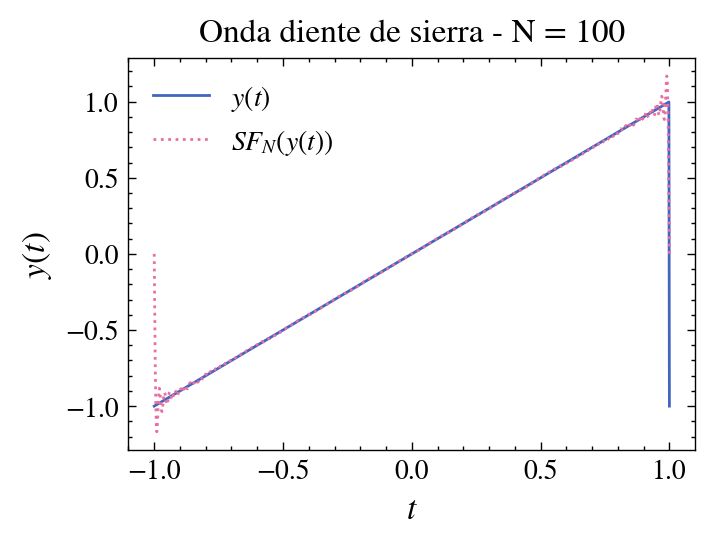

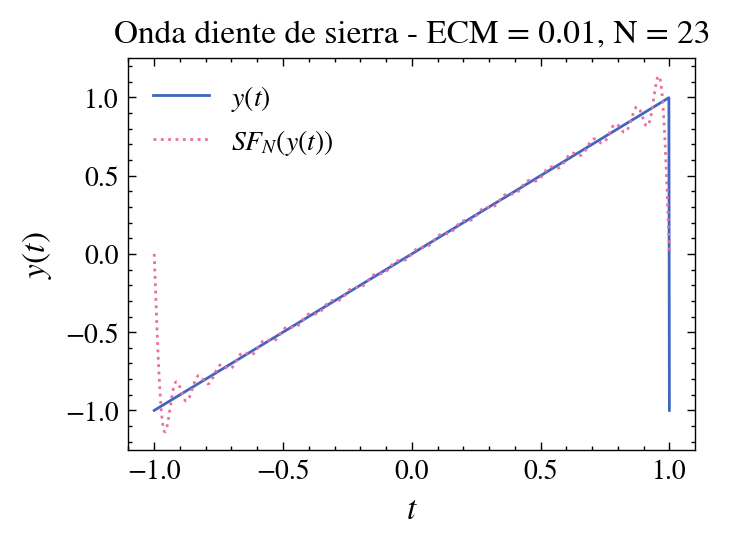

Numero de armónicos necesarios para tener un error cuadrático medio menor a 0.01 de la serie de Fourier trigonométrica de la onda diente de sierra: 23


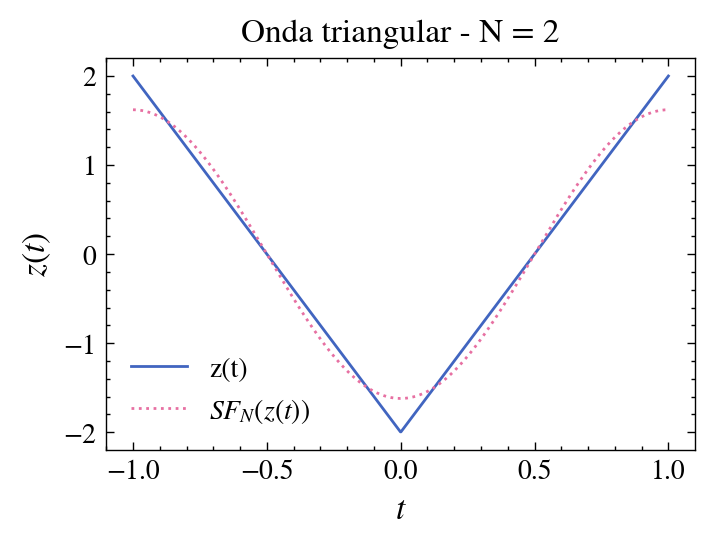

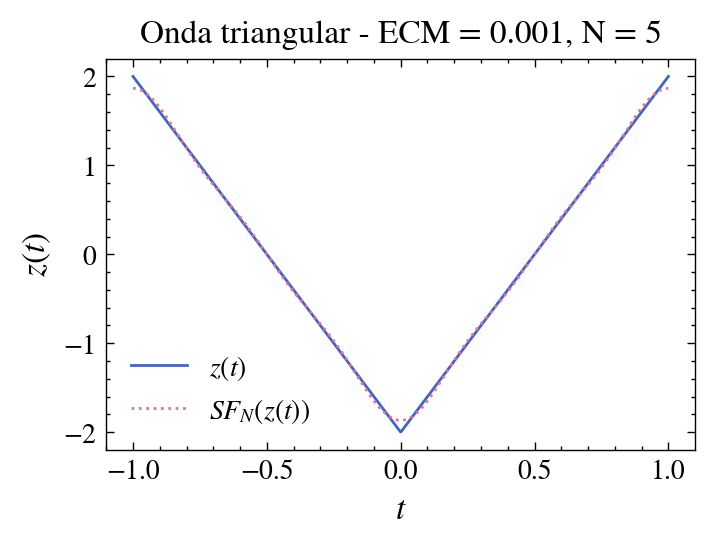

Numero de armónicos necesarios para tener un error cuadrático medio menor a 0.001 de la serie de Fourier trigonométrica de la onda triangular: 5


In [585]:
# Sawtooth wave Fourier series

# Trigonometric
a0, an, bn = sf_sawtooth()
T = 1 / F
N = 100

f = trigFourierSeries(an, bn, a0, T, N)

# Plot sawtooth wave and its Fourier series

t = np.linspace(-1, 1, 1000)
plt.plot(t, y(t), label=r'$y(t)$')
plt.plot(t, f(t), label=r'$SF_{N}(y(t))$')
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.title(f'Onda diente de sierra - N = {N}')
plt.legend()
plt.show()

#errors
# e = CuadraticMeanError(y, f, t)
# print(f'Numero de armónicos necesarios para tener un error cuadrático medio menor a {e} de la serie de Fourier trigonométrica de la onda diente de sierra:', amountArmonics(y, an, bn, a0, T, e))

e = 0.01
N = amountArmonics(y, an, bn, a0, T, e)
f = trigFourierSeries(an, bn, a0, T, N)

plt.plot(t, y(t), label=r'$y(t)$')
plt.plot(t, f(t), label=r'$SF_{N}(y(t))$')
plt.xlabel(r'$t$')
plt.ylabel(r'$y(t)$')
plt.legend()
plt.title(f'Onda diente de sierra - ECM = {e}, N = {N}')
plt.show()

print(f'Numero de armónicos necesarios para tener un error cuadrático medio menor a {e} de la serie de Fourier trigonométrica de la onda diente de sierra:', N)

# Triangle wave Fourier series
a0, an, bn = sf_triangle_wave()
T = 1 / F
N = 2
f = trigFourierSeries(an, bn, a0, T, N)

# Plot triangle wave and its Fourier series

t = np.linspace(-1, 1, 1000)
plt.plot(t, z(t), label=r'z(t)')
plt.plot(t, f(t), label=r'$SF_{N}(z(t))$')
plt.xlabel(r'$t$')
plt.ylabel(r'$z(t)$')
plt.title(f'Onda triangular - N = {N}')
plt.legend()
plt.show()

# e = CuadraticMeanError(z, f, t)
# print(f'Numero de armónicos necesarios para tener un error cuadrático medio menor a {e} de la serie de Fourier trigonométrica de la onda diente de sierra:', amountArmonics(z, an, bn, a0, T, e))

e = 0.001
N = amountArmonics(z, an, bn, a0, T, e)
f = trigFourierSeries(an, bn, a0, T, N)

plt.plot(t, z(t), label=r'$z(t)$')
plt.plot(t, f(t), label=r'$SF_{N}(z(t))$')
plt.xlabel(r'$t$')
plt.ylabel(r'$z(t)$')
plt.legend()
plt.title(f'Onda triangular - ECM = {e}, N = {N}') 
plt.show()

print(f'Numero de armónicos necesarios para tener un error cuadrático medio menor a {e} de la serie de Fourier trigonométrica de la onda triangular:', N)


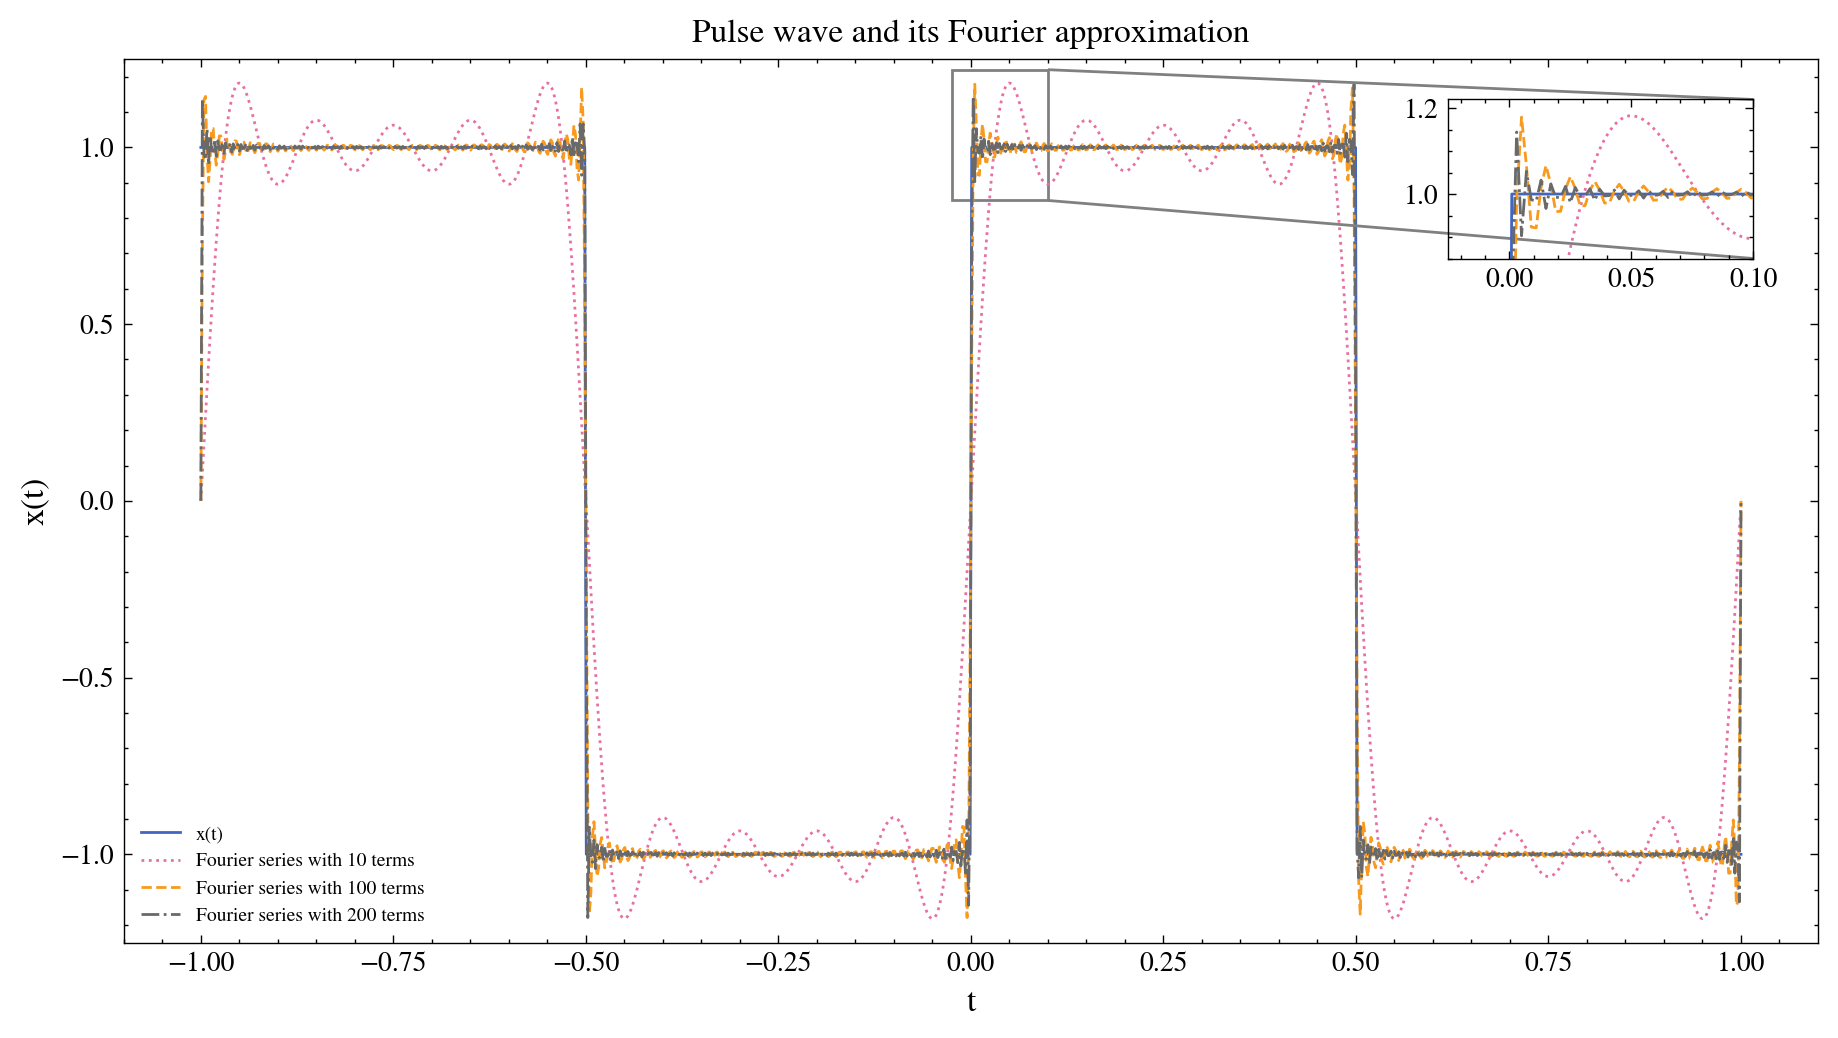

In [586]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

A = 1
F = 1

# Pulse wave
x = lambda t: A * np.sign(np.sin(2 * np.pi * F * t))

# Sawtooth wave
y = lambda t: A * (t * F - np.floor(0.5 + t * F))

a0 = 0
an = lambda n: 0
bn = lambda n: -2 * (A / (np.pi * n)) * (np.cos(np.pi * n) - 1)
c0 = 0
cn = lambda n: 1j * (A / (np.pi * n)) * (np.cos(np.pi * n) - 1)
T = 1 / F
N = 100


# Valores de t
t = np.linspace(-1, 1, 1000)

# Crear la figura y los ejes para el gráfico principal y el gráfico de zoom
fig, ax = plt.subplots(figsize=(9, 5))

# Plotea la función normal y las aproximaciones en el gráfico principal
armonics = [10, 100, 200]
ax.plot(t, x(t), label='x(t)')
ax.plot(t, trigFourierSeries(an, bn, a0, T, armonics[0])(t), label=f'Fourier series with {armonics[0]} terms')
ax.plot(t, trigFourierSeries(an, bn, a0, T, armonics[1])(t), label=f'Fourier series with {armonics[1]} terms')
ax.plot(t, trigFourierSeries(an, bn, a0, T, armonics[2])(t), label=f'Fourier series with {armonics[2]} terms')

# Configurar etiquetas y leyendas en el gráfico principal
ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.set_title('Pulse wave and its Fourier approximation')
ax.legend(loc='lower left', fontsize="7")

# Establecer los límites originales en el gráfico principal
original_xlim = ax.get_xlim()
original_ylim = ax.get_ylim()

# # Dibujar el rectángulo de zoom en el gráfico principal
# zoom_start = -0.025
# zoom_end = 0.1
# rect = Rectangle((zoom_start, 0.85), zoom_end - zoom_start, 1.22, fill=None, color='gray', alpha=0.5)
# ax.add_patch(rect)

# Establecer los límites en el gráfico principal para mostrar el rectángulo
ax.set_xlim(original_xlim)
ax.set_ylim((-1.25, 1.25))

# Crear un eje de zoom (sub-gráfico) en el mismo figure
axins = inset_axes(ax, width="20%", height="20%", loc='upper right', bbox_to_anchor=(0.07, 0.07, 0.9, 0.9), bbox_transform=ax.transAxes)
axins.plot(t, x(t))
axins.plot(t, trigFourierSeries(an, bn, a0, T, armonics[0])(t))
axins.plot(t, trigFourierSeries(an, bn, a0, T, armonics[1])(t))
axins.plot(t, trigFourierSeries(an, bn, a0, T, armonics[2])(t))

# Establecer los límites en el gráfico de zoom
axins.set_xlim(-0.025, 0.1)
axins.set_ylim(0.85, 1.22)

# Dibujar un rectángulo en el gráfico principal para indicar el área de zoom
mark_inset(ax, axins, loc1=1, loc2=4, fc="none", ec="0.5")

# Mostrar la figura completa
plt.savefig('pulse_wave_fourier_series.pdf', format='pdf', bbox_inches='tight')

Punto 6

900 1000


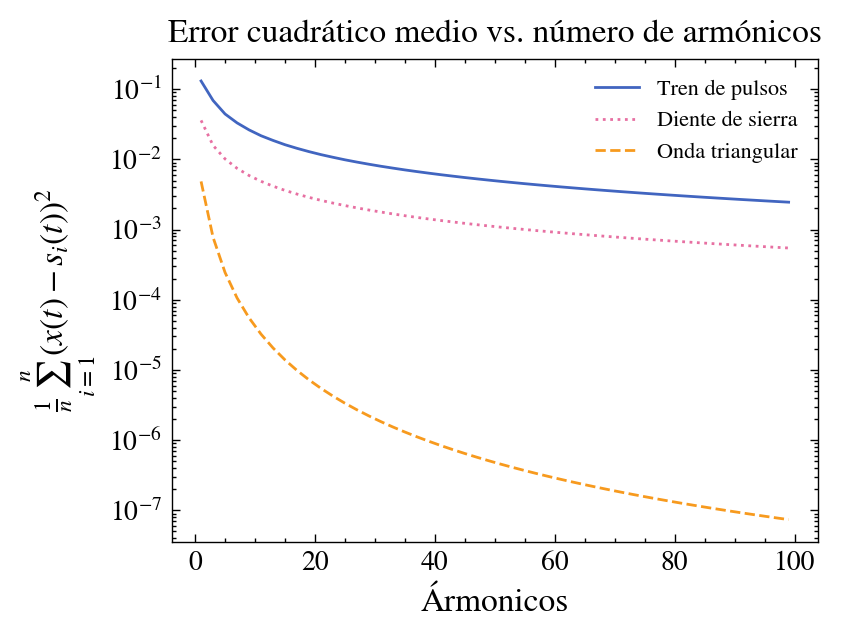

In [587]:
def errorVsTerms(f: callable, an: callable, bn: callable, a0: float, T: float, n: list, t: np.ndarray) -> np.ndarray:
    """
    Returns the error between f and its Fourier series
    for each number of terms.
    :param f: function
    :param an: function that returns the coefficient an
    :param bn: function that returns the coefficient bn
    :param a0: constant term
    :param T: period of the function
    :param epsilon: error
    :param N: number of terms
    """
    return np.array([CuadraticMeanError(f, trigFourierSeries(an, bn, a0, T, n), t) for n in n])

def removeDiscontinuity(t: np.ndarray, discontinuity: list) -> np.ndarray:
    """
    Returns the interval t without the discontinuities.
    :param t: interval
    :param discontinuity: list of discontinuities
    """
    #tomamos el 5% del intervalo para eliminar discontinuidades
    percent = np.abs(t[-1] - t[0]) * 0.05
    for d in discontinuity:
        t = t[(t < d - percent) | (t > d + percent)]
    return t

t = np.linspace(-1, 1, 1000)
n = np.arange(1, 100, 2)
a0pt, anpt, bnpt = sf_pulse_train()
xpt = pulse_train()
discontinuityPT = [-1, 0, 1]
tpt = removeDiscontinuity(t, discontinuityPT)
a0st, anst, bnst = sf_sawtooth()
yst = sawtooth()
discontinuityST = [-1, 1]
tst = removeDiscontinuity(t, discontinuityST)
a0tt, antt, bntt = sf_triangle_wave()
ztt = triangle()
errorptDis = errorVsTerms(xpt, anpt, bnpt, a0pt, T, n, tpt)
errorpt = errorVsTerms(xpt, anpt, bnpt, a0pt, T, n, t)
print(len(tst), len(t))
errorstDis = errorVsTerms(yst, anst, bnst, a0st, T, n, tst)
errorst = errorVsTerms(yst, anst, bnst, a0st, T, n, t)
errortt = errorVsTerms(ztt, antt, bntt, a0tt, T, n, t)
plt.figure(figsize=(4, 3))
plt.plot(n, errorptDis, label=f'Tren de pulsos')
plt.plot(n, errorstDis, label=f'Diente de sierra')
plt.plot(n, errortt, label=f'Onda triangular')
plt.xlabel('Ármonicos')
plt.ylabel(r'$\frac{1}{n} \sum_{i=1}^n (x(t) - s_i(t))^2$')
plt.title('Error cuadrático medio vs. número de armónicos')
plt.legend(fontsize=8)
plt.yscale('log')
plt.show()

#### Diente de sierra SF

\begin{align*}
x(t) &= A \left(tf-\left\lfloor \frac{1}{2} + tf \right\rfloor \right) & T &= \frac{1}{f} \\
\text{Tomamos 1 período } t &\in \left[-\frac{1}{2f}, \frac{1}{2f}\right] \\
t &= -\frac{1}{2f} & \rightarrow \left\lfloor \frac{1}{2} + \left(-\frac{1}{2f} f\right) \right\rfloor &= \left\lfloor \frac{1}{2} - \frac{1}{2} \right\rfloor = 0 \\
t &= \frac{1}{2f} & \rightarrow \left\lfloor \frac{1}{2} + \frac{1}{2f} f \right\rfloor &= \left\lfloor 1 \right\rfloor = 1 \\
\rightarrow \forall -\frac{1}{2f} &\leq t < \frac{1}{2f}, \lfloor \frac{1}{2} + tf \rfloor = 0 \\
\end{align*}

\begin{align*}
c_n &= f \int_{-\frac{1}{2f}}^{\frac{1}{2f}} Atf e^{-j2\pi fnt} \, dt = Af^2 \int_{-\frac{1}{2f}}^{\frac{1}{2f}} t e^{-j2\pi fnt} \, dt \\
&= Af^2 \left[ \left(t \frac{e^{-j2\pi fnt}}{-j2\pi fn}\right) \Bigg|_{-\frac{1}{2f}}^{\frac{1}{2f}} - \int_{-\frac{1}{2f}}^{\frac{1}{2f}} e^{-j2\pi fnt}dt \right] \\
&= Af^2 \left[\frac{1}{2f} \frac{e^{-j\pi n}}{-j2\pi nf} + \frac{1}{2f} \frac{e^{j\pi n}}{-j2\pi nf} + \left(\frac{e^{-j2\pi fnt}}{j2\pi nf}\right) \Bigg|_{-\frac{1}{2f}}^{\frac{1}{2f}} \right] \\
&= Af^2 \left[-\frac{1}{2f} \left(\frac{e^{j\pi n}}{j2\pi nf} + \frac{e^{-j\pi n}}{j2\pi nf}\right) + \frac{e^{-j\pi n}}{j2\pi nf} - \frac{e^{j\pi n}}{j2\pi nf}\right] \\
&= \frac{A}{\pi n} \left[-\frac{1}{2j} \left(\frac{e^{j\pi n} + e^{-j\pi n}}{2}\right) - f \left(\frac{e^{j\pi n}- e^{-j\pi n}}{2j}\right)\right] \\
&= \frac{A}{\pi n} \left[-\frac{1}{2j} \cos(\pi n) - f \sin(\pi n) \right] \\
&= \frac{A}{\pi n} \left[ \frac{j \cos(\pi n)}{2} - f \sin(\pi n) \right] \\
c_n &= \frac{A}{2\pi n} \left(j \cos(\pi n) - 2f \sin(\pi n) \right)  = -\frac{A}{2} \left[ 2f \frac{\sin(\pi n)}{\pi n} - j\frac{\cos(\pi n)}{\pi n} \right]\\
\end{align*}

\begin{align*}
\rightarrow a_n &= 2 \Re\left[c_n \right] = 2 \left[ \frac{A}{2\pi n} \left(-2f \sin(\pi n) \right) \right] = -2Af \frac{\sin(\pi n)}{\pi n} \\
\rightarrow b_n &= -2 \Im\left[c_n \right] = -2 \left[ \frac{A}{2\pi n} \left(\cos(\pi n) \right) \right] = -A \frac{\cos(\pi n)}{\pi n}
\end{align*}


#### Señal triangular SF

\begin{align*}
x(t) = 4A\Big|\frac{t}{T} - \lfloor \frac{t}{T} + \frac{1}{2} \rfloor \Big| -A  \quad \text{con } T = \frac{1}{f}\\
\rightarrow x(t) = 4A\Big|ft - \lfloor ft + \frac{1}{2} \rfloor \Big| -A \\ 
\text{Definimos } x_I (t) / t \in I \\
I = \left[-\frac{T}{2}, \frac{T}{2}\right] = \left[ -\frac{1}{2f}, \frac{1}{2f} \right] \\
\rightarrow x_I(t) = 
\begin{cases}
-A-4Aft, & -\frac{1}{2f} \leq t < 0 \\
-A+4Aft, & 0 \leq t \leq \frac{1}{2f} \\
\end{cases} \\

\text{La función es par con respecto al eje vertical, }\,  x(t) = x(-t) \, \forall t \text{, luego } b_n = 0 \\
\end{align*}

\begin{align*}
\text{Por lo tanto solo calculamos } a_n : \\
a_n &= \frac{2}{T} \int_{-\frac{T}{2}}^{\frac{T}{2}} x_I(t)\cos(2\pi nft) dt \\
&= 2f \left( \int_{-\frac{T}{2}}^{0} (-A-4Aft) \cos(2\pi nft) dt + \int_{0}^{\frac{T}{2}} (-A + 4Aft) \cos(2\pi nft) dt \right) \\
\text{ (es par) } \rightarrow &= 2 \cdot 2f \int_{0}^{\frac{T}{2}} (-A+4Aft) \cos(2\pi nft) dt \\
&= -4Af \int_{0}^{\frac{1}{2f}} \cos(2\pi nft) dt + 16Af^2 \int_{0}^{\frac{1}{2f}} t \cos(2\pi nft) dt \\
\text{Resolvemos } -4Af \int_{0}^{\frac{1}{2f}} \cos(2\pi nft) dt &= -4Af \left(\frac{\sin(2\pi nft)}{2\pi nf}\Bigg|_{0}^{\frac{1}{2f}}\right) \\
&= -\frac{2A}{n\pi} \sin(\pi n) = 0 \\
\text{Resolvemos la otra parte } 16Af^2 \int_{0}^{\frac{1}{2f}} t \cos(2\pi nft) dt &= 16Af^2 \left( \left[\frac{t\sin(2\pi nft)}{2\pi nf}\Bigg|_{0}^{\frac{1}{2f}}\right] - \frac{1}{2\pi nf} \int_{0}^{\frac{1}{2f}} \sin(2\pi nft)dt \right) \\
&= 16Af^2 \left[\frac{\sin(n\pi)}{4\pi nf^2} - \frac{1}{2\pi nf} \left(-\frac{\cos(2\pi nft)}{2\pi nf}\right)\Bigg|_{0}^{\frac{1}{2f}}\right] \\
&= \frac{16Af^2}{4\pi^2 n^2 f^2} \left(\cos(n\pi) - 1 \right) = \frac{4A}{\pi^2 n^2} \left(\cos(n\pi) - 1 \right) \\
&= \frac{4A}{\pi^2 n^2} \left(\left(-1 \right)^{n} - 1 \right) = a_n 
\end{align*}